- **Name: Marvin D. Llames** 
- **Term: 2 AY 2024-2025**

### Machine Problem 003: Transfer Function

The [Python Control Systems Library](https://github.com/python-control/python-control) provides basic tools for the analysis and design of linear feedback control systems. The library provides tools to specify transfer function and state space models, manipulate models using block diagram algebra, stability analysis, and perform time and frequency domain simulation.

The purpose of these notes is to provide a quick start with the Python Control Systems Library. Consult the [Python Control Systems Documentation](http://python-control.readthedocs.io/en/latest/) for more details.

#### Installation

The [Python Control Systems Library](https://github.com/python-control/python-control) is not, unfortunately, a standard part of most standard Python distributions. On most systems, the following commands will perform the required one-time installation of the necessary software.

To install both the Control Systems library and Slycot in an existing conda environment, run:
`!conda install -c conda-forge control slycot`

#### Library Usage

The control systems library is designed to work with a simplified syntax where libraries are imported without the standard prefixes.  

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

#### Demonstration

##### Step Response of Transfer Functions

The following cells demonstrate the use of two functions in the control systems library, `tf` and `step`. Suppose a signal $y(s)$ is related to an input $u(s)$ by the formula

$$y(s) = \underbrace{\frac{4.3}{3.2s + 1}}_{G(s)} u(s)$$

The transfer function

$$G(s) = \frac{4.3}{3.2 s + 1}$$

is represented in the control system libary using `tf(num,den)` where `num` and `den` list the coefficients of the numerator and denominator polynomials.  

In [2]:
G = control.tf([4.3],[3.2, 1])
print(G)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     4.3
  ---------
  3.2 s + 1


The step response is created and plotted as

Text(0.5, 1.0, 'Step Response')

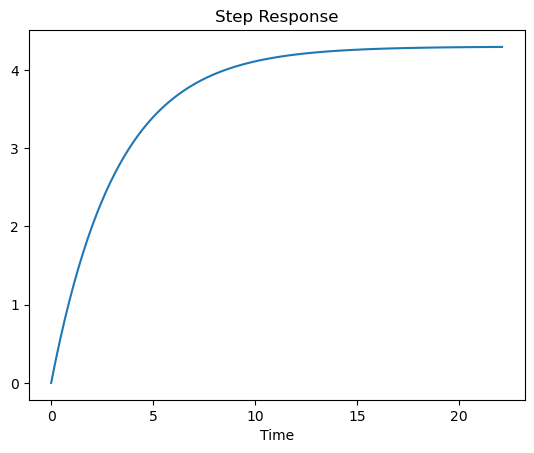

In [3]:
y,t = control.step(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Step Response')

##### Transfer Functions in Series

Models for complex systems are generally constructed by combining models of simpler elements. Consider, for example, a serial connection of two transfer functions

$$ y_1(s) = G_1(s) u(s)$$

$$ y_2(s) = G_2(s) y_1(s)$$

which can be diagrammed as

$$u(s) \longrightarrow \boxed{\\G_1(s)} \stackrel{y_1(s)}{\longrightarrow} \boxed{\\G_2(s)} 
\longrightarrow y_2(s)$$

The serial composition of two transfer functions can be written

$$y_2(s) = \underbrace{G_2(s)G_1(s)}_{G(s)} u(s)$$

where the product $G(s) = G_2(s)G_1(s)$ represents the transfer function of the combined system. In terms of a block diagram

$$u(s) \longrightarrow \boxed{\\G_1(s)} \stackrel{y_1(s)}{\longrightarrow} \boxed{\\G_2(s)} 
\longrightarrow y_2(s) \qquad \implies \qquad
u(s) \longrightarrow \boxed{\\G_2(s)G_1(s)} \longrightarrow y_2(s)$$

The product $G(s) = G_2(s)G_1(s)$$ is computed by taking the products of the numerator and denominator polynomials, respectively.  For example, suppose

$$G_1(s) = \frac{12.3}{10 s + 1} \text{   and   }G_2(s) = \frac{4}{15 s + 1}$$

Then

\begin{align*}
G(s) & = G_2(s)G_1(s) \\
& = \frac{4}{15 s + 1} \times \frac{12.3}{10 s + 1} = \frac{4 \times 12.3}{(15s + 1)(10s + 1)} = \frac{49.2}{150 s^2 + 25s + 1}
\end{align*}

We can verify this calculation using the control systems library.

<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         49.2
  ------------------
  150 s^2 + 25 s + 1


Text(0.5, 1.0, 'Step Response of Two First Order Transfer Functions in Series')

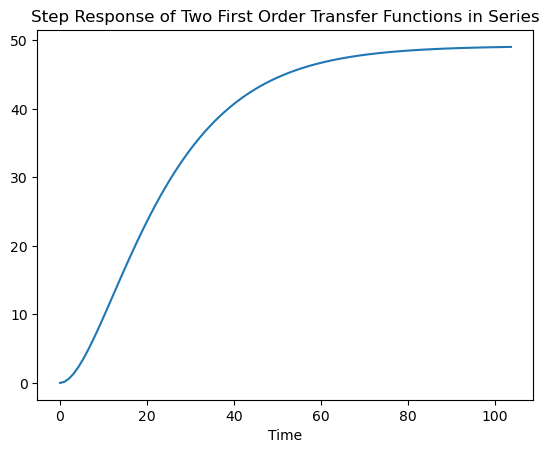

In [4]:
G1 = control.tf([12.3],[10,1])
G2 = control.tf([4],[15,1])

G = G2 * G1

print(G)

y,t = control.step(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Step Response of Two First Order Transfer Functions in Series')

##### Second Order Transfer Functions

The control systems library is particularly helpful when working with second and higher order transfer functions. For

$$G(s) = \frac{3}{4s^2 + s + 1}$$



<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        3
  -------------
  4 s^2 + s + 1


Text(0.5, 1.0, 'Response of a Second Order System')

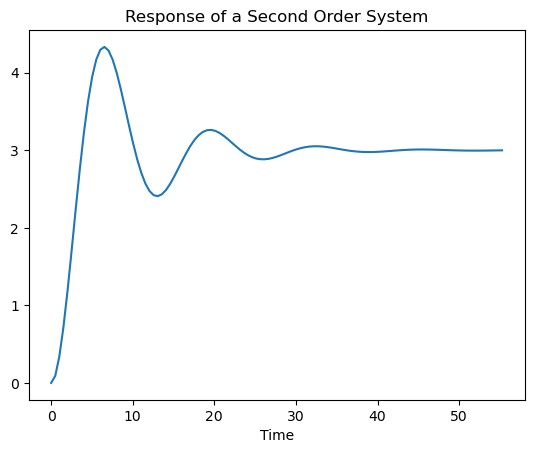

In [5]:
R = control.tf([3.],[4.,1.,1.])
print(R)

y,t = control.step(R)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Second Order System')